# Git

## Introdução

Este caderno foi traduzido automaticamente para torná-lo acessível a mais pessoas, por favor me avise se você vir algum erro de digitação..

O Git é um software de controle de versão criado por Linus Torvalds, que o criou para ter um bom controle de versão ao desenvolver o kernel do Linux.

## As áreas git

O Git tem três áreas, embora uma quarta também possa ser considerada.

![git states](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/git-states.webp)

 * O primeiro é o nosso espaço de trabalho, onde temos todo o nosso código. Aqui, quando modificamos ou criamos um arquivo, ele deixa de ser rastreado e, portanto, precisamos movê-lo para a área `staged`.
 * A segunda área é a área `staged`. É aqui que os arquivos que modificamos ou criamos e que não foram rastreados passam a ser rastreados, ou seja, o git os rastreia. Aqui, enviaremos os arquivos para a próxima área `head`.
 * A terceira área é a área `head`. Aqui registramos uma versão do nosso código. Dessa forma, ao salvar versões, podemos voltar a versões anteriores, se necessário. A versão salva do nosso código pode ser enviada a um servidor para que possa ser acessada por várias pessoas.
 * As três áreas acima correspondem ao trabalho local, mas há mais uma área, que é o "servidor remoto". Aqui, o que fazemos é enviar a versão gravada do nosso código para um servidor para que tenhamos acesso ao código de qualquer lugar ou para que mais pessoas tenham acesso a ele.

Para fazer uma analogia, é como um palco onde você vai tirar uma foto. Primeiro, você tem seus arquivos modificados, então envia os que deseja imortalizar para a área `staged`, ou seja, para o palco. Assim que tiver enviado todos os arquivos que considera, você tira a foto e envia todos os arquivos para a área `head`. Dessa forma, você pode tirar várias fotos, à medida que o código evolui, para que possa ter um álbum de fotos da evolução do código. Por fim, você pode carregar essa foto em um servidor para que ela fique acessível a mais pessoas, ou seja, você a envia para a área `servidor remoto`.

## Instalar o git

Na maioria das distribuições Linux, o git já está instalado e podemos verificar isso com `git --version`.

In [1]:
!git --version

git version 2.25.1


Se você não o tiver ou quiser atualizar sua versão do git, execute `sudo apt update` e, em seguida, `sudo apt install git`.

In [3]:
!sudo apt update && sudo apt install git

[sudo] password for maximo.fernandez@AEROESPACIAL.SENER: 


Verificamos novamente a versão

In [4]:
!git --version

git version 2.25.1


No meu caso, eu já tinha a versão mais recente

## Configuração inicial

### Configurações de nome e correio eletrônico

Antes de começar a usar o git, é conveniente que você faça algumas configurações mínimas, como o nome de usuário e o e-mail, pois essas informações são as que serão exibidas ao mostrar quem fez alterações no código. Para fazer isso, você precisa executar


````bash
git config --global user.name "<username>"
git config --global user.email "<email>"
```

No meu caso, eu colocaria

````bash
git config --global user.name "MaximoFN".
git config --global user.email "maximofn@gmail.com
```

Como você pode ver, o sinalizador `--global` altera a configuração global do git, mas se você precisar colocar outros dados em um repositório específico, basta navegar até o repositório e remover o sinalizador `--global` dos comandos acima.

````bash
git config user.name "<nome de usuário>"
git config user.email "<email>"
```

### Configurar o editor padrão

Quando explicarmos mais tarde o que é `commit`, veremos que uma das opções pode abrir um navegador para nós. Por padrão, o git tentará usar o `vim`, mas como não é um editor muito fácil de usar, podemos modificá-lo. Veja como fazer isso com alguns editores comuns

````bash
git config --global core.editor "code" # vscode como editor
git config --global core.editor "atom" # Atom como editor
git config --global core.editor "subl" # Sublime text como editor
git config --global core.editor "nano" # Nano como editor
```

### Verificar a configuração do git

Para verificar a configuração do git, podemos usar `git config --lits`.

In [6]:
!git config --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


Podemos usar os sinalizadores `--global`, `-local` e `--system` para ver apenas a configuração global, local (se houver) e do sistema (se houver).

In [8]:
!git config --global --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true


In [9]:
!git config --local --list

core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


In [10]:
!git config --system --list

fatal: unable to read config file '/etc/gitconfig': No such file or directory


No meu caso, não há configuração do sistema

Se você quiser saber apenas o valor de um parâmetro de configuração, basta digitar `git config <parameter>`.

In [15]:
!git config user.name

maximofn


## Controle de versão local

### Inicializando um novo repositório (`git init`)

Há duas maneiras de inicializar um novo repositório, fazendo
 * Uma delas é usar o `git init <nome do repositório>`. Isso criará uma nova pasta com o nome do repositório
 * Outra opção é navegar até a pasta onde queremos criar um repositório e executar o `git init`.

Vou criar um novo repositório

In [1]:
!git init notebook_git

Inicializado repositorio Git vacío en /home/wallabot/Documentos/web/portafolio/posts/notebook_git/.git/


Se agora fizermos `ls`, veremos que uma nova pasta chamada `notebook_git` foi criada.

In [3]:
!ls | grep notebook_git

notebook_git


Nós nos movemos para ele

In [4]:
!cd notebook_git

Agora, dentro da pasta, temos duas maneiras de saber que o repositório foi criado: uma delas é fazer `ls -a`, que mostrará todos os arquivos e veremos que há uma pasta chamada `.git`. A outra maneira é usar o `git status` que nos informará o status do repositório.

In [5]:
!cd notebook_git && ls -a

.  ..  .git


In [6]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

no hay nada para confirmar (crea/copia archivos y usa "git add" para hacerles seguimiento)


Como estamos em um notebook, cada célula tem seu `path` no `path` do notebook, então, nas duas vezes, tive que fazer `cd notebook_git &&`, para que ele mudasse para a pasta com o repositório que acabamos de criar.

Se eu tentar agora o `git status` em outro `path` em que um repositório não foi inicializado, ocorrerá um erro

In [95]:
!cd ~/ && git status

fatal: no es un repositorio git (ni ninguno de los directorios superiores): .git


### Criar novos arquivos

Assim que tivermos inicializado um repositório, poderemos começar a criar novos arquivos, portanto, vamos criar um e ver o que acontece.

In [7]:
!cd notebook_git && echo "print('Hello World')" > hello.py

Se fizermos `git status` novamente, veremos o que está sendo mostrado

In [8]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hello.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Como você pode ver agora, ele está nos informando que o arquivo `hello.py` não foi rastreado. Ou seja, temos que adicionar o `hello.py` à área `staged`, que, lembre-se, é como o palco onde colocaremos tudo o que mais tarde será fotografado.

### Desfazer a criação de um novo arquivo

Nesse caso, como são arquivos que o git ainda não está rastreando, ou seja, ainda não estão na área `staged`, teríamos três maneiras de fazer isso

 * Simplesmente excluindo-o: Como o git ainda não segue o arquivo, poderíamos fazer `rm hello.py` e pronto.
 * Exclusão com um comando git: Anteriormente, excluímos com o comando `rm`, mas é possível que você esteja em um sistema que não tenha o comando `rm` e, nesse caso, você pode usar o comando git `git rm hello.py`.
 * Finalmente, podemos usar o `git clean`. Isso é útil, por exemplo, quando há muitos arquivos novos e, portanto, em um único comando, excluímos todos eles.

#### `git clean`

Se simplesmente executarmos o `git clean`, ocorrerá um erro.

In [9]:
!cd notebook_git && git clean

fatal: clean.requireForce default en true y ninguno de -i, -n, ni -f entregado; rehusando el clean


Ele está nos dizendo que um desses sinalizadores `-n`, `-i` e `-f` precisa ser adicionado. Além disso, vamos dar uma olhada no sinalizador `-d

 * `-n` (dry run): informa quais arquivos devem ser excluídos, mas não os exclui.
 * `-i`: cada arquivo a ser excluído será solicitado.
 * `-f`: forçará a exclusão de arquivos
 * `-d`: também excluirá pastas.

Vamos testá-lo. Primeiro, usamos o `git clean -n` para saber quais arquivos seriam excluídos.

In [10]:
!cd notebook_git && git clean -n

Será borrado hello.py


Agora usamos o `git clean -f` para excluí-lo, já que concordamos em excluí-lo.

In [11]:
!cd notebook_git && git clean -f

Borrando hello.py


Como podemos ver, você excluiu o `hello.py`.

### Adicionar um arquivo à área de preparação (`git add`)

Recriamos um arquivo

In [12]:
!cd notebook_git && echo "print('Hola mundo')" > hola.py

Fazemos um `git status` novamente para verificar se temos o arquivo.

In [13]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hola.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Vemos que temos o arquivo `hola.py`, mas que o git não o está rastreando. Vemos também que ele nos ajuda e diz `use "git add" para rastreá-los`.

A sintaxe é `git add <file>`, mas podemos fazer isso de várias maneiras

 * Se quisermos adicionar mais de um arquivo, podemos fazê-lo colocando todos os arquivos que queremos adicionar à área de preparação, separados por um espaço: `git add <file1> <file2> <file3>`.
 * Se quisermos adicionar todos os arquivos do mesmo formato, por exemplo, se quisermos adicionar todos os arquivos python, será `git add *.py`.
 * Se quisermos adicionar todos os arquivos em uma pasta `git add <folder>/`
 * Se quisermos adicionar todos os arquivos, temos três maneiras: `git add --all`, `git add -A` ou `git add .`.

Vamos adicionar o arquivo recém-criado

In [14]:
!cd notebook_git && git add hola.py

Fazemos um `git status` para ver o que aconteceu.

In [15]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



Como podemos ver, ele nos informa que temos um novo arquivo que está sendo rastreado e aguardando confirmação `hola.py`.

### Remoção de um arquivo da área de preparação (`git reset`)

Caso adicionemos um arquivo à área de preparação e queiramos removê-lo, devemos usar o `git reset <file>`, vejamos

Criamos e adicionamos à área de preparação um novo arquivo

In [16]:
!cd notebook_git && echo "print('Este no')" > adios.py && git add adios.py

Usamos o `git status` para verificar se ele está na área de preparação.

In [17]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: adios.py
	nuevos archivos: hola.py



Como podemos ver, há o `hello.py` e o `adios.py`, portanto, usamos o `git reset adios.py` para removê-lo da área de preparação.

In [18]:
!cd notebook_git && git reset adios.py

Fazemos um `git status` para verificar se ele foi enviado.

In [19]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	adios.py



Podemos ver que o `adios.py` não é mais rastreado pelo git, ele foi removido da área de preparação.

Fazemos `git clean -f` para excluí-lo.

In [20]:
!cd notebook_git && git clean -f && git status

Borrando adios.py
En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



### Commit (`git commit`)

Se voltarmos à analogia em que dissemos que a área preparada era o estágio em que enviamos os arquivos dos quais queríamos tirar a foto, agora é hora de tirar a foto para imortalizar o estado atual. Isso é fazer um "commit".

Dessa forma, o estado atual do código é registrado e, portanto, a cada confirmação, teremos um registro da evolução do código. Como em um álbum de fotos, a cada foto temos um registro da evolução do que colocamos no palco.

Como no momento do commit a alteração do código está sendo registrada, o git não nos deixará fazer o commit se não fizermos um comentário mínimo. Portanto, há duas maneiras de fazer o commit

 * git commit` abrirá o editor que definimos na configuração do git. Se não tivermos definido um editor padrão, o `vi` será aberto. Se quisermos alterar a configuração do editor, podemos fazer, por exemplo, `git config --global core.editor "code"` ou `git config core.editor "code"` para definir o vscode como o editor padrão global ou localmente.
 * `git commit -m "Commit message"`. Dessa forma, adicionamos a mensagem diretamente

Ao fazer o commit da primeira maneira, podemos ter uma primeira linha que será o título do commit e várias outras linhas onde ele é explicado em mais detalhes. Se quisermos fazer isso com o sinalizador `-m`, basta adicionar vários sinalizadores `-m` em uma linha: `git commit -m "Título do commit" -m "Primeira linha explicando mais" -m "Segunda linha explicando mais"`.

Após o commit, isso manterá um registro da alteração em nosso repositório localmente. Ainda não nos conectamos a um servidor remoto

Vamos tentar nos comprometer

In [21]:
!cd notebook_git && git commit -m "Primer commit, hola.py"

[master (commit-raíz) 1c95e4f] Primer commit, hola.py
 1 file changed, 1 insertion(+)
 create mode 100644 hola.py


Fazemos um `git status`

In [22]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Vemos que isso nos diz que não há nada de novo, que temos todo o nosso repositório sob controle.

#### Commit skipping add (`git commit -a -m` ou `git commit -am`)

No caso de querermos mover todos os arquivos que modificamos para a área de preparação e depois confirmá-los, podemos fazer tudo isso em uma única etapa usando `git commit -a -m "message"`, `git commit --all -m "message"` ou `git commit -am "message"`.

 > Observação: isso só é válido se um arquivo for modificado. Se o arquivo for novo e o git não o rastrear, isso é inválido.

Vejamos um exemplo, vamos modificar o `hola.py`.

In [23]:
!cd notebook_git && echo "print('He añadido una nueva linea')" >> hola.py

Vamos fazer um `git status` para garantir que

In [24]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Podemos ver que a própria ajuda do git sugere o uso do `git commit -a`, então vamos fazer isso.

In [25]:
!cd notebook_git && git commit -am "Segundo commit, hola.py"

[master 6e99e73] Segundo commit, hola.py
 1 file changed, 1 insertion(+)


Refazemos um `git status`.

In [26]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Não há nada a comprometer, o comitê de mudança já foi criado.

### Modificar um arquivo para o qual foi feito um commit

Como estamos modificando arquivos durante o desenvolvimento, podemos modificar um arquivo que já foi confirmado. No nosso caso, vamos adicionar uma linha ao `hello.py`.

In [27]:
!cd notebook_git && echo "print('He añadido una tercera linea')" >> hola.py

In [28]:
!cd notebook_git && cat hola.py

print('Hola mundo')
print('He añadido una nueva linea')
print('He añadido una tercera linea')


Se fizermos o `git status`, veremos que o `hola.py` tem modificações

In [29]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


### Exibir alterações em um arquivo (`git diff <file>`)

É possível que estejamos desenvolvendo há algum tempo desde o último commit e não saibamos quais alterações fizemos, por isso usamos o `git diff <file>` para nos informar quais alterações fizemos.

In [30]:
!cd notebook_git && git diff hola.py

diff --git a/hola.py b/hola.py
index 91dee80..fba0d22 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1,3 @@
 print('Hola mundo')
 print('He añadido una nueva linea')
+print('He añadido una tercera linea')


Embora não seja muito intuitivo, podemos ver que adicionamos a última linha no `hola.py`.

### Desfazer alterações em um arquivo (`git restore <file>`)

Se não gostarmos das alterações que fizemos e quisermos removê-las, o que podemos fazer é `git restore <file>`.

In [31]:
!cd notebook_git && git restore hola.py

Vamos ver o que aconteceu com um `git status`.

In [32]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Vemos que as alterações no `hola.py` desde o último commit foram descartadas.

### Histórico de alterações (`git log`)

Com o git, podemos ver o histórico de todas as alterações que estamos fazendo, para isso usamos o `git log`. É como se estivéssemos vendo nosso álbum de fotos.

In [33]:
!cd notebook_git && git log

commit 6e99e73cf0c5474078cc9f328ee6a54fb9ffb169 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:04 2023 +0200

    Segundo commit, hola.py

commit 1c95e4fd8388ceedee368e0121c4b0ef4900c2ac
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:28:44 2023 +0200

    Primer commit, hola.py


Podemos ver o histórico de alterações e lê-lo de baixo para cima.

Primeiro, vemos o commit com a mensagem `First commit, hello.py`, podemos ver a data, o autor e o hash, que é seu identificador exclusivo.

Em seguida, vemos o segundo commit com a mensagem `Second commit, hello.py`, com sua data, autor e hash. Ele também nos mostra onde está o `HEAD` e em qual branch estamos.

Se usarmos sinalizadores, poderemos obter as informações de diferentes maneiras, mas, dependendo dos sinalizadores que usarmos, isso poderá ser melhor para nós:

 * `git log --oneline`: exibe os commits em uma única linha, com o hash abreviado e a mensagem do commit.
 * `git log --graph`: exibe um gráfico de texto do histórico do repositório, incluindo ramificações e mesclagens.
 * `git log --decorate`: mostra referências (branches, tags, HEAD, etc.) no registro junto com o commit para o qual elas apontam.
 * ` `git log --author="<author>"`: filtra o histórico de commits para mostrar apenas os commits feitos por um autor específico.
 * ` `git log --since="<date>"`: exibe os commits desde uma data específica. Você pode usar diferentes formatos de data, como "1 semana atrás" ou "2023-01-01".
 * ` `git log --until="<date>"`: exibe os commits até uma data específica.
 * `git log <branch>`: exibe os commits de uma ramificação específica.
 * `git log <commit1>..<commit2>`: exibe os commits que estão no intervalo entre dois commits específicos.
 * ` `git log --grep="<palavra>"`: pesquisa mensagens de commit para uma palavra ou frase específica.
 * `git log -p`: mostra as diferenças (em forma de patch) introduzidas em cada commit.
 * `git log -n <número>`: exibe o último número de commits. Por exemplo, git log -n 5 mostrará os últimos 5 commits.
 * `git log --stat`: exibe estatísticas de alteração de arquivo para cada commit, como o número de linhas adicionadas e removidas.

Por exemplo, uma maneira conveniente de visualizar o histórico é usar `git log --graph --oneline --decorate`.

In [34]:
!cd notebook_git && git log --graph --oneline --decorate

* 6e99e73 (HEAD -> master) Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Podemos ver que, em vez de nos fornecer o hash completo, ele nos fornece apenas alguns números. Isso ocorre porque, no momento, o repositório tem tão pouco histórico que esses poucos números são suficientes. Se quiséssemos voltar ao ponto anterior, em vez de inserir o hash completo (`7c448f69e30ab1b5783f5cf9ee3ae5bc362ecd4d`), apenas inserir `7c448f6` seria suficiente.

Falaremos sobre ramificações mais tarde, mas agora vamos dar uma olhada no que é o `HEAD`.

### CABEÇA

Durante o desenvolvimento, pudemos fazer alterações e comentá-las, ou seja, estamos preenchendo o álbum de fotos do nosso código. `HEAD` é a posição no álbum em que estamos.

Normalmente, é a última posição de todos os commits.

Se quisermos saber onde estamos, podemos fazer isso com o `git rev-parse HEAD`.

In [35]:
!cd notebook_git && git rev-parse HEAD

6e99e73cf0c5474078cc9f328ee6a54fb9ffb169


Como você pode ver, o hash obtido corresponde ao último hash obtido ao executar o `git log`.

In [36]:
!cd notebook_git && git log

commit 6e99e73cf0c5474078cc9f328ee6a54fb9ffb169 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:04 2023 +0200

    Segundo commit, hola.py

commit 1c95e4fd8388ceedee368e0121c4b0ef4900c2ac
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:28:44 2023 +0200

    Primer commit, hola.py


### Modificar um commit (`git commit --amend`)

Podemos querer modificar um commit porque queremos alterar a mensagem ou porque queremos adicionar mais arquivos ao commit, portanto, veremos os dois casos.

#### Modificar a mensagem de confirmação

Se quisermos apenas modificar a mensagem, o que precisamos fazer é `git commit --amend -m "New message"`. Vamos ver um exemplo: vamos modificar o arquivo `hello.py`.

In [37]:
!cd notebook_git && echo "print('Esta es la tercera linea')" >> hola.py

Fazemos um `git status`

In [38]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


De fato, vemos que o `hola.py` tem modificações, portanto, fazemos um commit com essas modificações

In [39]:
!cd notebook_git && git commit -am "Tercer commot, hola.py"

[master 60e2ffd] Tercer commot, hola.py
 1 file changed, 1 insertion(+)


Vamos dar uma olhada no histórico de commits

In [40]:
!cd notebook_git && git log --graph --oneline --decorate

* 60e2ffd (HEAD -> master) Tercer commot, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


**Oh não! **Escrevemos `commot` em vez de `commit`, portanto, vamos modificar a mensagem

In [41]:
!cd notebook_git && git commit --amend -m "Tercer commit, hola.py"

[master c4930d7] Tercer commit, hola.py
 Date: Sun Apr 16 02:29:59 2023 +0200
 1 file changed, 1 insertion(+)


Analisamos o hostorial novamente

In [42]:
!cd notebook_git && git log --graph --oneline --decorate

* c4930d7 (HEAD -> master) Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que agora está bem

#### Adicionar arquivos ao último commit

Suponhamos que tenhamos esquecido de adicionar um arquivo ao último commit, basta fazer um `git add` com esse arquivo e fazer `git commit --amend -m "message"`.

Criaremos dois novos arquivos

In [43]:
!cd notebook_git && echo "print('Este es el archivo 1')" > archivo1.py

In [44]:
!cd notebook_git && echo "print('Este es el archivo 2')" > archivo2.py

Agora cometemos apenas um

In [45]:
!cd notebook_git && git add archivo1.py && git commit -m "Commit con el archivo 1"

[master 285b243] Commit con el archivo 1
 1 file changed, 1 insertion(+)
 create mode 100644 archivo1.py


In [46]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo2.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [47]:
!cd notebook_git && git log --graph --oneline --decorate

* 285b243 (HEAD -> master) Commit con el archivo 1
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como podemos ver, deixamos o arquivo 2, portanto, modificamos o commit e adicionamos o arquivo 2.

In [48]:
!cd notebook_git && git add archivo2.py

In [49]:
!cd notebook_git && git commit --amend -m "Commit con los archivos 1 y 2"

[master 04ebd1f] Commit con los archivos 1 y 2
 Date: Sun Apr 16 02:30:26 2023 +0200
 2 files changed, 2 insertions(+)
 create mode 100644 archivo1.py
 create mode 100644 archivo2.py


In [50]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


In [51]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora, o último commit tem os dois novos arquivos

### Desfazer um commit (`git reset HEAD~1`)

Com esse comando, dizemos ao git para retroceder uma posição no histórico de commits. Há duas opções: `--soft`, que não exclui as alterações feitas, e `--hard`, que exclui.

#### Desfazer um commit mantendo as alterações (`git reset --soft HEAD~1`)

Vamos criar um novo arquivo

In [52]:
!cd notebook_git && echo "print('Este es el archivo 3')" > archivo3.py

Fazemos um `git status`

In [53]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo3.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Fazemos um commit adicionando este arquivo

In [54]:
!cd notebook_git && git add archivo3.py && git commit -m "Commit con el archivos 3"

[master 6dc7be6] Commit con el archivos 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


In [55]:
!cd notebook_git && git log --graph --oneline --decorate

* 6dc7be6 (HEAD -> master) Commit con el archivos 3
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que o último commit contém `file3.py`, vamos excluir o commit mantendo `file3.py`.

In [56]:
!cd notebook_git && git reset --soft HEAD~1

Agora fazemos um `git log` para ver se o último commit foi removido.

In [57]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


De fato, vemos que o último commit foi excluído.

Fazemos um `git status` para ver se o `file3.py` foi preservado.

In [58]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



Ele foi mantido

#### Desfazer um commit descartando as alterações (`git reset --hard HEAD~1`)

Criamos o `file3.py` e o colocamos na área de preparação.

In [59]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



Então, fazemos um commit

In [60]:
!cd notebook_git && git commit -m "Commit con el archivo 3"

[master 0147d65] Commit con el archivo 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


Fazemos um `git log` para verificar se há um commit com esse arquivo

In [61]:
!cd notebook_git && git log --graph --oneline --decorate

* 0147d65 (HEAD -> master) Commit con el archivo 3
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


De fato, há um commit adicionando `file3.py`. Agora, removemos esse commit descartando o `file3.py`.

In [62]:
!cd notebook_git && git reset --hard HEAD~1

HEAD está ahora en 04ebd1f Commit con los archivos 1 y 2


Fazemos um `git log` para verificar se o último commit foi removido.

In [63]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


O commit com `file3.py` foi removido, agora fazemos um `git status` para verificar o que aconteceu com o `file3.py`.

In [64]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Não há nenhum `file3.py` listado como um arquivo a ser enviado, vamos ver se ele foi de fato removido.

In [65]:
!cd notebook_git && ls | grep archivo3

File3.py' foi de fato removido do sistema de arquivos.

### Modificar um commit remoto (`git push --force`)

Embora veremos mais tarde como sincronizar com repositórios remotos, caso você tenha feito um commit, carregado-o em um repositório remoto (`git push`) e modificado o commit localmente (porque modificou a mensagem ou desfez o commit), para reverter as alterações no repositório remoto, é necessário fazer `git push --force`.

 > Cuidado: esse comando modifica o histórico do repositório remoto e, portanto, pode afetar outras pessoas que trabalham com esse repositório, portanto, use esse comando com muito cuidado e segurança. É melhor ter um histórico de commits, onde primeiro você tem o commit com a descrição errada e depois o novo commit com a nova descrição, do que sair por aí modificando o histórico.

### Modificar um commit remoto (`git push --force-with-lease`)

Se você estiver convencido a alterar o histórico, pelo menos use `git push --force-with-lease`, que não modificará os commits subsequentes.

### Ignorar arquivos (`.gitignore`)

Suponha que tenhamos um arquivo com `Chave API`s`, esse arquivo não queremos manter no repositório, porque se compartilharmos esse repositório, qualquer pessoa terá acesso a essas chaves, então temos que dizer ao git para não manter o controle desse arquivo.

Isso é feito com o arquivo `.gitignore`, no qual você adiciona o caminho para os arquivos ou diretórios que não deseja que o git rastreie.

Vamos ver isso

Criamos o arquivo com as chaves

In [66]:
!cd notebook_git && touch api_keys.py

Se usarmos `git status`, veremos que o git cobre o problema.

In [67]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	api_keys.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Se não fizermos nada, podemos fazer um `git add .` e colocá-lo no repositório, portanto, por motivos de segurança, temos que dizer ao git para não seguir esse arquivo, então o que fazemos é criar o `.gitignore` adicionando este arquivo

In [68]:
!cd notebook_git && echo "api_keys.py" >> .gitignore

Vamos ver o que acontece se fizermos `git status`.

In [69]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	.gitignore

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Vemos que o git não suporta mais o `api_keys.py`, mas suporta o `.gitignore`, portanto, fazemos o commit para adicionar o `.gitignore`.

In [70]:
!cd notebook_git && git add .gitignore && git commit -m "Añadido .gitignore"

[master 0b09cfa] Añadido .gitignore
 1 file changed, 1 insertion(+)
 create mode 100644 .gitignore


#### Quais arquivos devem ser adicionados ao `.gitignore`?

 * Arquivos que tenham credenciais ou chaves de API (você não deve carregá-los no repositório, apenas injetá-los por meio de uma variável de ambiente)
 * As pastas de configuração do seu editor (`/.vscode`)
 * Arquivos de registro
 Arquivos do sistema como `.DS_Store` * Arquivos do sistema como `.DS_Store`.
 * Pastas geradas com arquivos estáticos ou compilações, como `/dist` ou `/build`.
 * Dependências que podem ser baixadas (`/node_modules`)
 * Cobertura do teste (`/coverage`)

#### Como ignorar sempre os mesmos arquivos?

Se, por exemplo, seu IDE sempre gera os mesmos arquivos de configuração, seria bom poder dizer ao git para sempre ignorar esses arquivos, por isso criamos um `.gitignore` global.

In [42]:
!touch ~/.gitignore_global

No meu caso, adicionarei o diretório `__pycache__/`.

In [50]:
!echo "__pycache__/" >> ~/.gitignore_global

Agora precisamos informar ao git que esse é o nosso `.gitignore` global.

In [54]:
!git config --global core.excludesfile ~/.gitignore_global

Feito, de agora em diante o diretório `__pycache__/` será sempre ignorado.

O GitHub tem um [repositório](https://github.com/github/gitignore) com `.gitignore`s para muitas linguagens, eu me guiei por [este](https://github.com/github/gitignore/blob/main/Python.gitignore) para Python

### Excluir um arquivo de um commit

Vamos ver como excluir um arquivo de um commit que fizemos. Primeiro, criamos dois arquivos e os compartilhamos.

In [71]:
!cd notebook_git && echo "print('Este es el archivo 4')" > archivo4.py

In [72]:
!cd notebook_git && echo "print('Este es el archivo 5')" > archivo5.py

Confirmamos os dois arquivos

In [73]:
!cd notebook_git && git add archivo4.py archivo5.py && git commit -m "Commit con los archivos 4 y 5"

[master e3153a5] Commit con los archivos 4 y 5
 2 files changed, 2 insertions(+)
 create mode 100644 archivo4.py
 create mode 100644 archivo5.py


In [74]:
!cd notebook_git && git log --graph --oneline --decorate

* e3153a5 (HEAD -> master) Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


A partir daí, há duas opções para remover um arquivo de um commit:
 * Excluir o arquivo e criar um novo commit
 * Desfazer o commit e criá-lo novamente sem o arquivo

#### Excluir arquivo e criar novo commit

Suponha que desejemos excluir o arquivo `file5.py`, então o excluímos com `git rm file5.py`.

In [75]:
!cd notebook_git && git rm archivo5.py

rm 'archivo5.py'


Vamos fazer um `git status` e ver o que acontece.

In [76]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	borrados:        archivo5.py



Como podemos ver, o `file5.py` foi excluído. Agora criamos um novo commit

In [77]:
!cd notebook_git && git commit -m "Eliminado archivo5.py"

[master ea615a9] Eliminado archivo5.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo5.py


In [78]:
!cd notebook_git && git log --graph --oneline --decorate

* ea615a9 (HEAD -> master) Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


#### Desfaça o commit e recrie-o sem o arquivo

Recriamos dois arquivos e os confirmamos.

In [79]:
!cd notebook_git && echo "print('Este es el archivo 6')" > archivo6.py && echo "print('Este es el archivo 7')" > archivo7.py

In [80]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py
	archivo7.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [81]:
!cd notebook_git && git add archivo6.py archivo7.py && git commit -m "Commit con los archivos 6 y 7"

[master d6dc485] Commit con los archivos 6 y 7
 2 files changed, 2 insertions(+)
 create mode 100644 archivo6.py
 create mode 100644 archivo7.py


In [82]:
!cd notebook_git && git log --graph --oneline --decorate

* d6dc485 (HEAD -> master) Commit con los archivos 6 y 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Primeiro, desfazemos o último commit com `git reset --soft HEAD~1`.

In [83]:
!cd notebook_git && git reset --soft HEAD~1

Fazemos um `git status` para ver o que aconteceu.

In [84]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo6.py
	nuevos archivos: archivo7.py



Podemos ver que o commit foi desfeito, mas os dois arquivos estão na área de preparação, portanto, para remover um dos arquivos do commir, devemos primeiro removê-lo da área de preparação.

In [85]:
!cd notebook_git && git reset archivo6.py

Refazemos um `git status`.

In [86]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py



Vemos que `file7.py` está na área de preparação, enquanto `file6.py` não está mais na área de preparação. Agora podemos excluir o arquivo 6, usando o `git clean`.

In [87]:
!cd notebook_git && git clean -n

Será borrado archivo6.py


In [88]:
!cd notebook_git && git clean -f

Borrando archivo6.py


Refazemos um `git status`.

In [89]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py



Como podemos ver, o arquivo `archiv6.py` desapareceu, portanto, podemos confirmar um novo arquivo `archiv6.py`.

In [90]:
!cd notebook_git && git commit -m "Commit con el archivo 7"

[master 4bb9d75] Commit con el archivo 7
 1 file changed, 1 insertion(+)
 create mode 100644 archivo7.py


In [91]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Excluímos o último commit e o substituímos por um novo, excluindo o arquivo que queríamos

### Histórico de alterações de um arquivo (`git log <file>`)

Embora tenhamos visto anteriormente como podemos ver o histórico do repositório com o `git log`, talvez não estejamos interessados no histórico de todo o repositório. Podemos ter um bug em um arquivo de código que não tínhamos no início, portanto, podemos querer ver apenas o histórico desse arquivo, por isso usamos o `git log <file>`.

Primeiro, examinamos os arquivos que temos

In [92]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Suponha que desejamos ver apenas as alterações no `hello.py`, então usamos `git log hello.py`.

In [93]:
!cd notebook_git && git log --graph --oneline --decorate hola.py

* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Podemos ver que há muito menos resultados do que se tivéssemos usado o `git log`.

In [94]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Visualizar modificações em um arquivo em um ponto específico do histórico (`git show <hash> <arquivo>` ou `git diff <arquivo>`)

Suponha que já saibamos em que momento foi feita uma alteração no arquivo que contém um erro, então agora queremos saber quais alterações foram feitas para descobrir o que pode estar causando o erro usando `git show <hash> <file>`.

Vamos ver quais alterações foram feitas no `hello.py` no hash `c4930d7`, ou seja, quando o terceiro commit foi feito.

In [98]:
!cd notebook_git && git show c4930d7 hola.py

commit c4930d7267c3f8df389ab0cb1bda0b5fceabb5c2
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:59 2023 +0200

    Tercer commit, hola.py

diff --git a/hola.py b/hola.py
index 91dee80..33bdb99 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1,3 @@
 print('Hola mundo')
 print('He añadido una nueva linea')
+print('Esta es la tercera linea')


A maneira de ver as alterações no git não é muito intuitiva, mas podemos ver que a linha `print('This is the third line')` foi adicionada.

Outra maneira de ver as alterações é com o `git diff`, temos duas opções, podemos ver as alterações do arquivo no momento atual com um ponto específico no histórico, para isso fazemos o `git diff <hash> <file>`.

Por exemplo, se quisermos ver as alterações em `hello.py` desde quando o primeiro commit foi feito (hash `1c95e4f`) com a situação atual, teremos que digitar (`git diff 1c95e4f hello.py`)

In [99]:
!cd notebook_git && git diff 1c95e4f hola.py

diff --git a/hola.py b/hola.py
index f140969..33bdb99 100644
--- a/hola.py
+++ b/hola.py
@@ -1 +1,3 @@
 print('Hola mundo')
+print('He añadido una nueva linea')
+print('Esta es la tercera linea')


Mas se você quiser ver a diferença entre um ponto específico no histórico e outro ponto específico no histórico, será necessário inserir os hashes dos dois pontos no tempo, ou seja, `git diff <hash1> <hash2> <file>`.

Se quisermos ver as alterações feitas no arquivo `hello.py` entre o segundo commit (hash `6e99e73`) e o primeiro commit (hash `1c95e4f`), teremos que digitar `git diff 1c95e4f 6e99e73 hello.py`.

In [101]:
!cd notebook_git && git diff 1c95e4f 6e99e73 hola.py

diff --git a/hola.py b/hola.py
index f140969..91dee80 100644
--- a/hola.py
+++ b/hola.py
@@ -1 +1,2 @@
 print('Hola mundo')
+print('He añadido una nueva linea')


O exemplo acima nos mostra as alterações do segundo commit em relação ao primeiro, mas se quisermos as alterações do primeiro commit em relação ao segundo, basta colocar os hashes de forma inversa, ou seja, `git diff 6e99e73 1c95e4f hello.py`.

In [102]:
!cd notebook_git && git diff 6e99e73 1c95e4f hola.py

diff --git a/hola.py b/hola.py
index 91dee80..f140969 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1 @@
 print('Hola mundo')
-print('He añadido una nueva linea')


### Viajar para o passado (`git reset --hard <hash>` ou `git reset --soft <hash>`)

Vamos imaginar que descobrimos que tudo o que fizemos depois de gerar o bug não é bom e temos que retrabalhar a partir desse ponto. Podemos voltar a uma posição histórica com `git reset --hard <hash>` (isso não manterá as alterações) ou `git reset --soft <hash>` (isso manterá as alterações).

Primeiro, vamos dar uma olhada no histórico

In [103]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Suponha que queiramos ir para o momento em que fizemos o terceiro commit (hash `c4930d7`), e o façamos sem manter as alterações, ou seja, todas as modificações que fizemos depois serão excluídas, fazemos `git reset --hard c4930d7`.

Primeiro, usamos o `ls` para ver os arquivos que temos agora

In [104]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Vamos para o terceiro commit

In [105]:
!cd notebook_git && git reset --hard c4930d7

HEAD está ahora en c4930d7 Tercer commit, hola.py


Se fizermos `ls`, veremos que não temos mais `file1.py`, `file2.py`, `file4.py` ou `file7.py`.

In [106]:
!cd notebook_git && ls

api_keys.py  hola.py


### De volta ao futuro (`git reflog`)

Suponha que tenhamos arrependimentos e queiramos voltar para onde estávamos, para o último ponto do histórico, uma maneira seria fazer `git reset --hard <hash>` novamente. Mas vamos imaginar que não sabemos o hash, porque não fizemos o `git log` antes e, se o fizermos agora, ele só nos dará informações do histórico até o terceiro commit.

In [107]:
!cd notebook_git && git log --graph --oneline --decorate

* c4930d7 (HEAD -> master) Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Aqui, o que podemos fazer é o `git reflog`, que nos fornecerá um histórico incluindo os saltos.

In [108]:
!cd notebook_git && git reflog

c4930d7 (HEAD -> master) HEAD@{0}: reset: moving to c4930d7
4bb9d75 HEAD@{1}: commit: Commit con el archivo 7
ea615a9 HEAD@{2}: reset: moving to HEAD~1
d6dc485 HEAD@{3}: commit: Commit con los archivos 6 y 7
ea615a9 HEAD@{4}: commit: Eliminado archivo5.py
e3153a5 HEAD@{5}: commit: Commit con los archivos 4 y 5
0b09cfa HEAD@{6}: commit: Añadido .gitignore
04ebd1f HEAD@{7}: reset: moving to HEAD~1
0147d65 HEAD@{8}: commit: Commit con el archivo 3
04ebd1f HEAD@{9}: reset: moving to HEAD~1
6dc7be6 HEAD@{10}: commit: Commit con el archivos 3
04ebd1f HEAD@{11}: commit (amend): Commit con los archivos 1 y 2
285b243 HEAD@{12}: commit: Commit con el archivo 1
c4930d7 (HEAD -> master) HEAD@{13}: commit (amend): Tercer commit, hola.py
60e2ffd HEAD@{14}: commit: Tercer commot, hola.py
6e99e73 HEAD@{15}: commit: Segundo commit, hola.py
1c95e4f HEAD@{16}: commit (initial): Primer commit, hola.py


Podemos ver que ele nos diz que estávamos no commit com hash `4bb9d75`, ou seja, o último commit que fizemos, e de lá fomos para o commit com hash `c4930d7`, que, se você notar, é o mesmo hash do commit com a mensagem `Third commit, hello.py`. Portanto, já sabemos o hash do último commit, `4bb9d75`, então, para voltar à posição do último commit, fazemos `git reset --hard 4bb9d75`.

In [109]:
!cd notebook_git && git reset --hard 4bb9d75

HEAD está ahora en 4bb9d75 Commit con el archivo 7


Se agora voltarmos ao registro

In [110]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que estamos de fato na posição do último commit, *voltamos para o futuro*.

### Pesquisar em arquivos (`git grep <word>`)

Se quisermos pesquisar em arquivos, podemos fazer isso com o comando `git grep`. Como o repositório que criamos é muito pequeno e tem poucos arquivos, vamos fazer o download de um novo repositório usando um comando que veremos mais tarde em mais detalhes

In [5]:
!git clone https://github.com/facebookresearch/segment-anything.git

Clonando en 'segment-anything'...
remote: Enumerating objects: 279, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 279 (delta 116), reused 104 (delta 104), pack-reused 98
Recibiendo objetos: 100% (279/279), 18.31 MiB | 21.25 MiB/s, listo.
Resolviendo deltas: 100% (140/140), listo.


O repositório que baixamos é o código-fonte do SAM, uma rede neural Meta para segmentar qualquer objeto. Entramos na pasta do repositório e procuramos, por exemplo, quantas vezes a palavra `softmax` foi digitada.

In [8]:
!cd segment-anything && git grep softmax

segment_anything/modeling/image_encoder.py:        attn = attn.softmax(dim=-1)
segment_anything/modeling/transformer.py:        attn = torch.softmax(attn, dim=-1)


Vemos que ele foi escrito nos arquivos `segment_anything/modeling/image_encoder.py` e `segment_anything/modeling/transformer.py`.

Se agora também quisermos saber em quais linhas dos arquivos ele foi gravado, usaremos o sinalizador `-n`.

In [9]:
!cd segment-anything && git grep -n softmax

segment_anything/modeling/image_encoder.py:236:        attn = attn.softmax(dim=-1)
segment_anything/modeling/transformer.py:233:        attn = torch.softmax(attn, dim=-1)


Se quisermos contar quantas vezes a palavra aparece, podemos usar o sinalizador `-c`.

In [10]:
!cd segment-anything && git grep -c softmax

segment_anything/modeling/image_encoder.py:1
segment_anything/modeling/transformer.py:1


E vemos que ele aparece uma vez em cada arquivo

E ele nos informa que está nas linhas 236 e 233, respectivamente.

### Pesquisar em commits (`git log -S <word>`)

Se quisermos pesquisar o histórico de confirmações, podemos usar o comando `git log -S <word>`. Por exemplo, vamos pesquisar o histórico de commits do repositório que baixamos anteriormente para a palavra `fix`.

In [19]:
!cd segment-anything && git log -S "collab"

commit 2780a301de4483e5c46edb230ea781556159c658
Author: Eric Mintun <eric.mintun@gmail.com>
Date:   Mon Apr 10 10:50:17 2023 -0700

    Fix typo in notebook 'using_collab'->'using_colab' in other two notebooks.

commit 2c11ea23525970ac288f23dc74b203bcbfb4cc6a
Author: jp-x-g <jpxg-dev@protonmail.com>
Date:   Thu Apr 6 20:00:04 2023 -0700

    fix parameter name
    
    "using_collab" does not appear in subsequent text, replacing with "using_colab"

commit b47d02d68c308672751be29742fcef02a86e2f02
Author: Eric Mintun <eric.mintun@gmail.com>
Date:   Wed Apr 5 06:13:09 2023 -0700

    Fix broken links in notebook Colab setup.

commit 571794162e0887c15d12b809505b902c7bf8b4db
Author: Eric Mintun <eric.mintun@gmail.com>
Date:   Tue Apr 4 22:25:49 2023 -0700

    Initial commit


Excluir a pasta SAM

In [100]:
!rm -r segment-anything

## Ramos

![branches](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/GIT-Branchand-its-Operations.webp)

O uso de ramificações é muito útil, pois podemos começar a desenvolver um novo recurso sem precisar modificar o código original.

### Criar uma ramificação (`git branch <nome da ramificação>`)

 > Observação: antes de tudo, é preciso dizer que, para criar uma ramificação em um repositório, deve haver pelo menos um commit; se você tentar criar uma ramificação antes de fazer o primeiro commit, receberá um erro.

Para criar uma ramificação, usamos o comando `git branch <nome da ramificação>`.

In [111]:
!cd notebook_git && git branch new_branch

### Listar ramificações (`git branch`)

Criamos nossa primeira ramificação e podemos verificar todas as ramificações que criamos digitando apenas `git branch`.

In [112]:
!cd notebook_git && git branch

* master
  new_branch


Além de listar, ele nos informa com um asterisco `*` em qual ramo estamos, nesse caso, o ramo `master`.

### Renomeie as ramificações, adeus à ramificação `master` (`git branch -m <nome antigo> <nome novo>`)

Historicamente, no git, o ramo principal tem sido chamado de `master`, mas isso tem algumas conotações históricas ruins por causa do conceito `master-slave`, devido ao sofrimento que muitas pessoas receberam, então agora o ramo principal é frequentemente chamado de `main`, então para renomeá-lo usamos `git branch -m master main`.

In [113]:
!cd notebook_git && git branch -m master main

Listamos as filiais

In [114]:
!cd notebook_git && git branch

* main
  new_branch


Como podemos ver, conseguimos alterar o nome da ramificação principal de `master` para `main`.

### Trocar de ramo (`git switch <branch>`)

Se você quiser trocar de ramificação, basta digitar `git switch <nome da ramificação>`.

In [115]:
!cd notebook_git && git switch new_branch

Cambiado a rama 'new_branch'


Vamos ver em qual ramo estamos com o `git branch`.

In [116]:
!cd notebook_git && git branch

  main
* new_branch


Como podemos ver, alteramos o ramo para new_branch

Se quisermos criar e alternar ramificações em um único comando, podemos usar `git switch -c <nome da ramificação>`.

In [117]:
!cd notebook_git && git switch -c new_branch2

Cambiado a nueva rama 'new_branch2'


Vamos ver em qual filial estamos

In [118]:
!cd notebook_git && git branch

  main
  new_branch
* new_branch2


Criamos e trocamos de ramificações com um único comando

### Obter o ramo em que estamos (`git branch --show-current`)

Como vimos até agora, com o `git branch` podemos obter uma lista de todas as ramificações e também ver aquela em que estamos atualmente, mas no caso de termos muitas ramificações, o que pode acontecer em uma equipe com muitas pessoas, não há problema em obter a ramificação e não obter uma lista de todas elas, para isso usamos o `git branch --show-current`.

In [119]:
!cd notebook_git && git branch --show-current

new_branch2


### Lista das ramificações mais recentes (`git branch --sort=-committerdate`)

Caso você tenha muitas ramificações, talvez queira saber quais são as mais recentes para ver quais foram as últimas criadas e onde deve estar o desenvolvimento mais recente.

In [120]:
!cd notebook_git && git branch --sort=-committerdate

* new_branch2
  new_branch
  main


Como podemos ver, ele os organizou em ordem inversa à de quando os criamos.

### O comando obsoleto `git checkout`.

Até um tempo atrás, o comando para criar ramificações e alternar entre elas era o `git checkout`, mas esse comando não só faz isso, como também restaura o diretório de trabalho. Mas isso vai contra a filosofia do Linux, então os comandos `git branch`, `git swicth` e `git restore` foram criados para dividir essa funcionalidade.

### Mesclando ramificações (`git merge`)

Conforme mencionado acima, a criação de ramificações é muito útil para desenvolver novos recursos sem afetar o restante da equipe. Mas quando essas ramificações são concluídas, elas precisam ser movidas para a ramificação principal, por isso usamos o comando `git merge <branch>`.

 > Importante**: Precisamos estar na ramificação que adotará as alterações, ou seja, se quisermos mesclar as alterações feitas na ramificação `new_branch2` na ramificação `main`, primeiro precisamos ter certeza de que estamos na ramificação `main`.

Primeiro, verificamos em qual filial estamos

In [121]:
!cd notebook_git && git branch --show-current

new_branch2


Excluir `file7.py`

In [122]:
!cd notebook_git && git rm archivo7.py

rm 'archivo7.py'


Confirmamos as alterações

In [123]:
!cd notebook_git && git commit -am "Eliminado archivo7.py"

[new_branch2 5168f78] Eliminado archivo7.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo7.py


Se fizermos um `ls`, veremos que o `file7.py` não está mais lá.

In [124]:
!cd notebook_git && ls | grep archivo7

Criamos um novo arquivo e o confirmamos

In [125]:
!cd notebook_git && touch archivo8.py && git add archivo8.py && git commit -m "Commit con el archivo 8"

[new_branch2 564ccfb] Commit con el archivo 8
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 archivo8.py


Fizemos dois novos commits nesse ramo, vamos dar uma olhada nele com o `git log`.

In [126]:
!cd notebook_git && git log --graph --oneline --decorate

* 564ccfb (HEAD -> new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch, main) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Mudar para a filial principal

In [127]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Se fizermos `ls` novamente, veremos que `file7.py` é de fato

In [128]:
!cd notebook_git && ls | grep archivo7

archivo7.py


Mesclar ramificações, trazer alterações de `new_branch2` para `main`.

In [129]:
!cd notebook_git && git merge new_branch2

Actualizando 4bb9d75..564ccfb
Fast-forward
 archivo7.py | 1 -
 archivo8.py | 0
 2 files changed, 1 deletion(-)
 delete mode 100644 archivo7.py
 create mode 100644 archivo8.py


Fazemos um `git status`

In [130]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


Podemos ver que, ao fazer a mesclagem, não é necessário fazer nenhum commit, vamos ver com um `git log` o que aconteceu.

In [131]:
!cd notebook_git && git log --graph --oneline --decorate

* 564ccfb (HEAD -> main, new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que o commit do ramo `new_branch2` foi incorporado a esse ramo.

#### Avanço rápido

Nesse caso, criamos um novo ramo, não tocamos no ramo principal e apenas modificamos o novo ramo, fazendo vários commits. Portanto, quando mesclamos o novo ramo com o ramo principal, veremos todos os commits que foram feitos no novo ramo. Para executar esse tipo de mesclagem, digitamos `git merge --ff-only <branch>`.

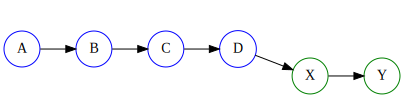

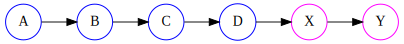

In [132]:
### Este código es para crear el gráfico de las ramas, no es necesario para el curso

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
fast_foward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
fast_foward.node('A', shape='circle', label='A', color='blue')
fast_foward.node('B', shape='circle', label='B', color='blue')
fast_foward.node('C', shape='circle', label='C', color='blue')
fast_foward.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
fast_foward.node('X', shape='circle', label='X', color='magenta')
fast_foward.node('Y', shape='circle', label='Y', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
fast_foward.edges(['AB', 'BC', 'CD', 'DX', 'XY'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(fast_foward)

Primeiro, vamos verificar se estamos na ramificação principal.

In [133]:
!cd notebook_git && git branch --show-current

main


Criamos uma nova filial

In [134]:
!cd notebook_git && git branch branch_fast_forward

Mudamos para ele

In [135]:
!cd notebook_git && git switch branch_fast_forward

Cambiado a rama 'branch_fast_forward'


In [136]:
!cd notebook_git && git branch --show-current

branch_fast_forward


Vamos dar uma olhada no registro

In [137]:
!cd notebook_git && git log --graph --oneline --decorate --all

* 564ccfb (HEAD -> branch_fast_forward, new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


OK, estamos em uma ramificação criada a partir da ramificação principal com todo o seu histórico de registros, fazemos dois novos commits

In [138]:
!cd notebook_git && git rm archivo4.py && git commit -am "Eliminado archivo4.py"

rm 'archivo4.py'
[branch_fast_forward 4484e70] Eliminado archivo4.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo4.py


In [139]:
!cd notebook_git && git rm hola.py && git commit -am "Eliminado hola.py"

rm 'hola.py'
[branch_fast_forward 94149fc] Eliminado hola.py
 1 file changed, 3 deletions(-)
 delete mode 100644 hola.py


Criamos um novo registro para ver que nessa nova ramificação foram criados

In [140]:
!cd notebook_git && git log --graph --oneline --decorate

* 94149fc (HEAD -> branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como podemos ver, os dois últimos commits são os que criamos e podemos verificar se esses commits não estão na ramificação principal (para isso, especifico fazer isso na ramificação `main`).

In [141]:
!cd notebook_git && git log main --graph --oneline --decorate

* 564ccfb (new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora vamos para o ramo `main` para fazer a mesclagem.

In [142]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Por fim, fazemos a mesclagem de avanço rápido.

In [143]:
!cd notebook_git && git merge --ff-only branch_fast_forward

Actualizando 564ccfb..94149fc
Fast-forward
 archivo4.py | 1 -
 hola.py     | 3 ---
 2 files changed, 4 deletions(-)
 delete mode 100644 archivo4.py
 delete mode 100644 hola.py


A mesclagem foi feita, vamos ver o que aconteceu com o registro na ramificação `main`.

In [144]:
!cd notebook_git && git log --graph --oneline --decorate

* 94149fc (HEAD -> main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como você pode ver, os dois commits feitos no `branch_fast_forward_frog foram mantidos.

#### Sem avanço rápido ou mesclagem real

Nesse caso, criamos uma nova ramificação, deixamos a ramificação principal intocada e modificamos a nova, fazendo vários commits. Em seguida, fazemos um commit no branch principal. Portanto, quando mesclamos o novo ramo com o principal, veremos um único commit no novo ramo. Para fazer esse tipo de mesclagem, digitamos `git merge <branch> --no-ff`.

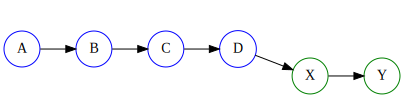

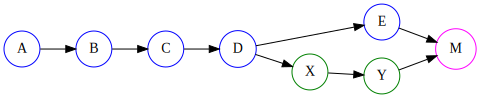

In [145]:
### Este código es para crear el gráfico de las ramas, no es necesario para el curso

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
not_fast_forward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
not_fast_forward.node('A', shape='circle', label='A', color='blue')
not_fast_forward.node('B', shape='circle', label='B', color='blue')
not_fast_forward.node('C', shape='circle', label='C', color='blue')
not_fast_forward.node('D', shape='circle', label='D', color='blue')
not_fast_forward.node('E', shape='circle', label='E', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
not_fast_forward.node('X', shape='circle', label='X', color='green')
not_fast_forward.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
not_fast_forward.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
not_fast_forward.edges(['AB', 'BC', 'CD', 'DE'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])
not_fast_forward.edges(['DX', 'XY', 'YM'])

# Agregar flechas de la rama principal al nodo M
not_fast_forward.edge('E', 'M')

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(not_fast_forward)

Primeiro, vamos verificar se estamos na ramificação principal.

In [146]:
!cd notebook_git && git branch --show-current

main


Criamos uma nova filial

In [147]:
!cd notebook_git && git branch branch_no_fast_forward

Mudamos para ele

In [148]:
!cd notebook_git && git switch branch_no_fast_forward

Cambiado a rama 'branch_no_fast_forward'


In [149]:
!cd notebook_git && git branch --show-current

branch_no_fast_forward


OK, estamos em uma ramificação criada a partir da ramificação principal com todo o seu histórico de registros, fazemos dois novos commits

In [150]:
!cd notebook_git && touch file1 && git add file1 && git commit -m "file1"

[branch_no_fast_forward e4e23c9] file1
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file1


In [151]:
!cd notebook_git && touch file2 && git add file2 && git commit -m "file2"

[branch_no_fast_forward 8df3429] file2
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file2


Criamos um novo registro para ver que nessa nova ramificação foram criados

In [152]:
!cd notebook_git && git log --graph --oneline --decorate

* 8df3429 (HEAD -> branch_no_fast_forward) file2
* e4e23c9 file1
* 94149fc (main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como podemos ver, os dois últimos commits são os que criamos e podemos verificar se esses commits não estão na ramificação principal (para isso, especifico fazer isso na ramificação `main`).

In [153]:
!cd notebook_git && git log main --graph --oneline --decorate

* 94149fc (main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora vamos para o ramo `main`.

In [154]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Criamos um novo commit

In [155]:
!cd notebook_git && touch file3 && git add file3 && git commit -m "file3"

[main 8bdf4d8] file3
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file3


Por fim, fazemos a mesclagem sem avanço rápido.

In [152]:
!cd notebook_git && git merge branch_no_fast_forward --no-ff

ommit. comenzando con '#' serán ignoradas, y un mensaje vacío abortasaria esta># especialmente si esto fusiona un upstream actualizado en una rama de tópico. /home/wallabot/Documentos/web/portafolio/posts/notebook_git/.git/MERGE_MSG   [ línea 1/7 (14%), col 1/48 (2%), car 0/301 (0%) ]             [ Párrafo justificado ]...llabot/Documentos/web/portafolio/posts/notebook_git/.git/MERGE_MSG Modificado

Como podemos ver, ele abre o editor para inserir uma mensagem de confirmação e uma mensagem padrão. Aceitamos a mensagem e vemos o que aconteceu

In [156]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


In [157]:
!cd notebook_git && git log --graph --oneline --decorate

*   274529c (HEAD -> main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


In [158]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo8.py  file1  file2  file3


Como podemos ver, um novo commit foi criado com as alterações da nova ramificação na ramificação principal.

#### Squash

Nesse tipo de mesclagem, todos os commits de uma nova ramificação são mesclados em um commit na ramificação principal; para isso, digitamos `git merge <branch> --squash`.

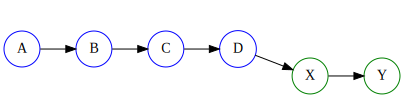

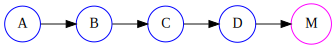

In [159]:
### Este código es para crear el gráfico de las ramas, no es necesario para el curso

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
squash = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
squash.node('A', shape='circle', label='A', color='blue')
squash.node('B', shape='circle', label='B', color='blue')
squash.node('C', shape='circle', label='C', color='blue')
squash.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
squash.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
squash.edges(['AB', 'BC', 'CD', 'DM'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(squash)

Primeiro, vamos verificar se estamos na ramificação principal.

In [160]:
!cd notebook_git && git branch --show-current

main


Criamos uma nova filial

In [161]:
!cd notebook_git && git branch branch_squash

Mudamos para ele

In [162]:
!cd notebook_git && git switch branch_squash

Cambiado a rama 'branch_squash'


In [163]:
!cd notebook_git && git branch --show-current

branch_squash


Vamos dar uma olhada no registro

In [164]:
!cd notebook_git && git log --graph --oneline --decorate --all

*   274529c (HEAD -> branch_squash, main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


OK, estamos em uma ramificação criada a partir da ramificação principal com todo o seu histórico de registros, fazemos três novos commits

In [165]:
!cd notebook_git && git rm file1 && git commit -am "Eliminado file1"

rm 'file1'
[branch_squash 767b632] Eliminado file1
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1


In [166]:
!cd notebook_git && git rm file2 && git commit -am "Eliminado file2"

rm 'file2'
[branch_squash a47f771] Eliminado file2
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file2


In [167]:
!cd notebook_git && git rm file3 && git commit -am "Eliminado file3"

rm 'file3'
[branch_squash 85f8c9f] Eliminado file3
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file3


Criamos um novo registro para ver que nessa nova ramificação foram criados

In [168]:
!cd notebook_git && git log --graph --oneline --decorate

* 85f8c9f (HEAD -> branch_squash) Eliminado file3
* a47f771 Eliminado file2
* 767b632 Eliminado file1
*   274529c (main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como podemos ver, os três últimos commits são os que criamos e podemos verificar se esses commits não estão na ramificação principal (para isso, especifico fazer isso na ramificação `main`).

In [169]:
!cd notebook_git && git log main --graph --oneline --decorate

*   274529c (main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora vamos para o ramo `main` para fazer a mesclagem.

In [170]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Fazemos a fusão de abóbora

In [171]:
!cd notebook_git && git merge branch_squash --squash

Actualizando 274529c..85f8c9f
Fast-forward
Commit de aplastamiento -- no actualizando HEAD
 file1 | 0
 file2 | 0
 file3 | 0
 3 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1
 delete mode 100644 file2
 delete mode 100644 file3


A mesclagem foi feita, vamos ver o que aconteceu com o registro na ramificação `main`.

In [172]:
!cd notebook_git && git log --graph --oneline --decorate

*   274529c (HEAD -> main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As alterações feitas na ramificação não aparecem, vamos fazer um `git status`.

In [173]:
!cd notebook_git && git status

En la rama main
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	borrados:        file1
	borrados:        file2
	borrados:        file3



Vemos que temos que fazer o commit com a mesclagem. Isso se deve ao fato de o git não saber qual mensagem colocar nele e deixar que nós o façamos, então nós o fazemos.

In [174]:
!cd notebook_git && git commit -m "Merge squash de los commits de la rama branch_squash"

[main 52acb97] Merge squash de los commits de la rama branch_squash
 3 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1
 delete mode 100644 file2
 delete mode 100644 file3


Refazemos um `git log`.

In [175]:
!cd notebook_git && git log --graph --oneline --decorate

* 52acb97 (HEAD -> main) Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Conflitos de fusão

Ao mesclar ramificações, pode acontecer de o mesmo arquivo ter sido modificado em várias ramificações. Isso pode ser normal em projetos em que várias pessoas estão desenvolvendo, portanto, vamos ver como corrigir isso.

#### Criamos um conflito

Verificamos se estamos no ramo `main`.

In [176]:
!cd notebook_git && git branch --show-current

main


Criamos um novo ramo a partir deste

In [177]:
!cd notebook_git && git branch rama_con_conflicto

Adicionamos uma linha ao arquivo `file1.py`, lembrando que estamos no ramo `main`.

In [178]:
!cd notebook_git && echo "print('rama main')" >> archivo1.py

In [179]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama main')


file1.py` é modificado, fazemos um commit

In [180]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py en rama main"

[main 53f909b] archivo1.py en rama main
 1 file changed, 1 insertion(+)


Agora, vamos para a ramificação `branch_with_conflict` e adicionamos uma nova linha ao `file1.py`.

In [181]:
!cd notebook_git && git switch rama_con_conflicto

Cambiado a rama 'rama_con_conflicto'


In [182]:
!cd notebook_git && git branch --show-current

rama_con_conflicto


In [183]:
!cd notebook_git && echo "print('rama rama_con_conflicto')" >> archivo1.py

In [184]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama rama_con_conflicto')


Como podemos ver, o arquivo `file1.py` não é o mesmo na ramificação `main` e na ramificação `branch_with_conflict`. Confirmamos a modificação de `file1.py` no ramo `branch_with_conflict`.

In [185]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py en rama rama_con_conflicto"

[rama_con_conflicto 32851c3] archivo1.py en rama rama_con_conflicto
 1 file changed, 1 insertion(+)


Voltar para a ramificação `main

In [186]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


In [187]:
!cd notebook_git && git branch --show-current

main


Nós mesclamos a ramificação `branch_with_conflict`.

In [188]:
!cd notebook_git && git merge rama_con_conflicto

Auto-fusionando archivo1.py
CONFLICTO (contenido): Conflicto de fusión en archivo1.py
Fusión automática falló; arregle los conflictos y luego realice un commit con el resultado.


Ao fazer a mesclagem, já somos avisados de que há um conflito em `file1.py` e que a mesclagem não pôde ser feita. Fazemos um `git status`.

In [189]:
!cd notebook_git && git status

En la rama main
Tienes rutas no fusionadas.
  (arregla los conflictos y ejecuta "git commit"
  (usa "git merge --abort" para abortar la fusion)

Rutas no fusionadas:
  (usa "git add <archivo>..." para marcar una resolución)
	modificados por ambos:  archivo1.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Ele nos diz a mesma coisa, mas nos dá mais informações: ele nos diz que podemos abortar a mesclagem com `git merge --abort`. Mas, em vez disso, vamos corrigir isso

#### Resolução de um conflito

No nosso caso, sabemos onde está o problema, mas, caso não saibamos, podemos encontrar o problema usando o `git diff`.

In [190]:
!cd notebook_git && git diff archivo1.py

diff --cc archivo1.py
index 8b4bf58,b5c003c..0000000
--- a/archivo1.py
+++ b/archivo1.py
@@@ -1,2 -1,2 +1,6 @@@
  print('Este es el archivo 1')
++<<<<<<< HEAD
 +print('rama main')
++=======
+ print('rama rama_con_conflicto')
++>>>>>>> rama_con_conflicto


O git diff está nos dizendo que o problema está na última linha. A versão do arquivo da ramificação `HEAD` (onde estamos atualmente `main`) tem `print('branch main')` na última linha, enquanto a versão da ramificação `branch_with_conflict` tem `print('branch_with_conflict')` na última linha. Portanto, você deve abrir o arquivo com qualquer editor e corrigir isso.

Depois de editar o arquivo com meu editor de código, removi todas as linhas extras e ele ficou assim

In [192]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama main')

Agora, fazemos um `git status` para ver o que precisamos fazer.

In [193]:
!cd notebook_git && git status

En la rama main
Tienes rutas no fusionadas.
  (arregla los conflictos y ejecuta "git commit"
  (usa "git merge --abort" para abortar la fusion)

Rutas no fusionadas:
  (usa "git add <archivo>..." para marcar una resolución)
	modificados por ambos:  archivo1.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Ele nos informa que temos o arquivo `file1.py` com modificações, então o adicionamos à área `staged` e o confirmamos.

In [194]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py con el merge resuelto"

[main 679bb49] archivo1.py con el merge resuelto


Fazemos um `git status` novamente para ver se o problema foi resolvido.

In [195]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


Parece que o problema foi resolvido, fizemos um `git log` para verificar.

In [196]:
!cd notebook_git && git log --graph --oneline --decorate

*   679bb49 (HEAD -> main) archivo1.py con el merge resuelto
|\  
| * 32851c3 (rama_con_conflicto) archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Remover ramificações

A ideia de uma ramificação é abri-la para desenvolver uma nova funcionalidade ou recurso de uma forma que não afete o restante da equipe de desenvolvimento. Assim, quando isso é alcançado, ela é mesclada com a ramificação principal. Portanto, após a mesclagem, não faz mais sentido manter a ramificação, por isso ela precisa ser removida, mas isso será feito de uma maneira diferente se a ramificação tiver sido mesclada ou não com a ramificação principal.

#### Exclua as ramificações que foram mescladas (`git branch -d <branch>`)

Para excluir uma ramificação que já tenha sido mesclada à ramificação principal, basta executar `git branch -d <branch>` ou `git branch --delete <branch>`. Vamos excluir o último branch que criamos e mesclamos

In [197]:
!cd notebook_git && git branch -d rama_con_conflicto

Eliminada la rama rama_con_conflicto (era 32851c3).


Se agora listarmos todas as ramificações, poderemos ver que não teremos mais `branch_with_conflict`.

In [198]:
!cd notebook_git && git branch

  branch_fast_forward
  branch_no_fast_forward
  branch_squash
* main
  new_branch
  new_branch2


#### Remova as ramificações que não foram mescladas com a ramificação principal (`git brnach -D <branch>`)

Se tentarmos fazer o mesmo que antes com uma ramificação que nunca foi mesclada com outra ramificação, receberemos um erro.

Vamos criar uma nova ramificação, confirmá-la e não mesclá-la.

In [199]:
!cd notebook_git && git branch branch_sin_fusion

In [200]:
!cd notebook_git && git switch branch_sin_fusion

Cambiado a rama 'branch_sin_fusion'


In [201]:
!cd notebook_git && touch file4 && git add file4 && git commit -m "file4"

[branch_sin_fusion 9506b0a] file4
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file4


In [202]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Com tudo o que aprendemos até agora, podemos ver que o que fizemos foi criar uma nova ramificação, mudar para ela, criar um novo arquivo, confirmá-lo e voltar para a ramificação `main`. Agora vamos tentar excluir essa nova ramificação

In [203]:
!cd notebook_git && git branch -d branch_sin_fusion

error: La rama 'branch_sin_fusion' no ha sido fusionada completamente.
Si estás seguro de querer borrarla, ejecuta 'git branch -D branch_sin_fusion'.


Como podemos ver, ele nos diz que o `branch_sin_fusion` não foi mesclado, portanto, não foi removido e que, se quisermos removê-lo, temos que fazer `git branch -D branch_sin_fusion`, portanto, fazemos isso para removê-lo.

In [204]:
!cd notebook_git && git branch -D branch_sin_fusion

Eliminada la rama branch_sin_fusion (era 9506b0a).


Agora ele foi removido

## Trabalhar com repositórios remotos

Quando desenvolvemos software, geralmente não o fazemos sozinhos, mas sim em equipes, portanto, não faz sentido ter um repositório git local, mas sim um repositório remoto com o qual todos trabalhamos e compartilhamos nosso progresso.

 > Observação: o objetivo desta postagem é explicar o git. Para a conexão com repositórios remotos, explicarei com o GitHub porque é o serviço de hospedagem de repositório git mais usado, mas não vou me aprofundar no GitHub.

### Clonar um repositório remoto (`git clone <repositório>`)

Se começarmos a trabalhar em um repositório que já foi criado, a primeira coisa a fazer é cloná-lo. Para isso, devemos usar `git clone <repository>`, em que `<repository>` pode ser uma URL ou um endereço SSH. Como agora todo o tópico de modelos de linguagem grnades e ChatGPT está muito em voga, vamos clonar um repositório de código aberto criado pela comunidade, [Open-Assistant](https://github.com/LAION-AI/Open-Assistant), para isso faremos `git clone https://github.com/LAION-AI/Open-Assistant`.

In [11]:
!git clone https://github.com/LAION-AI/Open-Assistant.git

Clonando en 'Open-Assistant'...
remote: Enumerating objects: 29769, done.
remote: Counting objects: 100% (673/673), done.
remote: Compressing objects: 100% (310/310), done.
remote: Total 29769 (delta 398), reused 577 (delta 354), pack-reused 29096
Recibiendo objetos: 100% (29769/29769), 33.61 MiB | 29.29 MiB/s, listo.
Resolviendo deltas: 100% (19967/19967), listo.


Isso cria a pasta `Open-Assistant` com todo o código do repositório, podemos entrar nela e ver todo o código

In [13]:
!cd Open-Assistant && ls

ansible		 deploy		      model	      safety
assets		 discord-bots	      notebooks       scripts
backend		 docker		      oasst-data      setup.cfg
CODEOWNERS	 docker-compose.yaml  oasst-shared    text-frontend
CONTRIBUTING.md  docs		      pyproject.toml  website
copilot		 inference	      README.md
data		 LICENSE	      redis.conf


Excluo a pasta

In [100]:
!rm -r Open-Assistant

### Vinculação de um repositório local a um repositório remoto

Se for o contrário, se primeiro começarmos a desenvolver localmente e depois quisermos sincronizá-lo com um repositório remoto, teremos que fazer o seguinte

 * Primeiro, crie um repositório remoto vazio; no meu caso, criei o repositório `notebook_git` no GitHub, que será excluído posteriormente.
 * Obter a URL do repositório ou o endereço SSH
 * Sincronize-os usando `git remote add origin <URL>.

O repositório vazio que criei no GitHub tem a seguinte aparência

![notebook git repo](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo.webp)

No meu caso, usarei o endereço SSH que é `git@github.com:maximofn/notebook_git.git`.

In [205]:
!cd notebook_git && git remote add origin git@github.com:maximofn/notebook_git.git

Eles já estão vinculados, mas para ter certeza, podemos usar o `git remote -v`.

In [206]:
!cd notebook_git && git remote -v

origin	git@github.com:maximofn/notebook_git.git (fetch)
origin	git@github.com:maximofn/notebook_git.git (push)


### Fazer upload de alterações de um repositório local para um repositório remoto (`git push`)

Como dissemos, eles estão vinculados, mas se eu acessar meu repositório no GitHub, ele ainda terá a seguinte aparência

![notebook git repo](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo.webp)

O repositório local e o remoto estão vinculados, mas agora precisamos fazer push de todas as alterações do repositório local para o repositório remoto, portanto, devemos usar `git push origin <local branch>:<remote branch>`, ou seja, como nosso branch principal é chamado de `main` e o branch principal no GitHub é chamado de `main`, devemos fazer `git push origin main:main`.
Se você se lembra, o padrão do git é chamar o branch principal de `master`, mas o padrão do GitHub é chamar o branch principal de `main`, portanto, se todos em seu repositório local chamarem seus branches de uma maneira, você terá que especificar qual branch localmente grava em qual branch remotamente.

Você pode configurar a conexão padrão entre as ramificações no git fazendo `git push --set-upstream origin main`. Isso estabelece uma relação entre o ramo local `main` e o ramo remoto `main`. Depois que essa relação for estabelecida, você só precisará usar `git push` para fazer upload das alterações feitas localmente no servidor remoto.

Assim, estabelecemos a conexão entre as filiais

In [207]:
!cd notebook_git && git push --set-upstream origin main

Enumerando objetos: 51, listo.
Contando objetos: 100% (51/51), listo.
Compresión delta usando hasta 12 hilos
Comprimiendo objetos: 100% (38/38), listo.
Escribiendo objetos: 100% (51/51), 4.21 KiB | 2.11 MiB/s, listo.
Total 51 (delta 18), reusado 0 (delta 0)
remote: Resolving deltas: 100% (18/18), done.
To github.com:maximofn/notebook_git.git
 * [new branch]      main -> main
Rama 'main' configurada para hacer seguimiento a la rama remota 'main' de 'origin'.


Agora podemos simplesmente "enviar" as alterações locais para o repositório remoto.

In [208]:
!cd notebook_git && git push

Everything up-to-date


Se agora voltarmos ao nosso repositório do GitHub, ele terá a seguinte aparência

![notebook git repo push](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo_push.webp)

Se fizermos um `ls` em nosso repositório local, poderemos ver que os arquivos que temos no repositório remoto estão no repositório local, ou seja, sincronizamos o repositório local e o remoto.

In [209]:
!cd notebook_git && ls -a

.  ..  api_keys.py  archivo1.py  archivo2.py  archivo8.py  .git  .gitignore


Os únicos que não estão no repositório remoto são o `api_keys.py`, que foi adicionado ao arquivo `.gitignore`, ou seja, aquele que dissemos ao git para não seguir. E `.git`, que é onde está a configuração do nosso repositório local e que não precisa ser carregada no repositório remoto, pois cada pessoa terá sua própria configuração do git e, portanto, não precisa ser sincronizada.

### Faça o download das alterações de um repositório remoto para um repositório local (`git pull`)

Agora vamos fazer o inverso, vamos baixar as novas alterações que foram feitas no repositório remoto. Se olharmos para o repositório remoto, veremos que há um botão `Add to README`, então clicaremos nele para adicioná-lo.

![notebook git repo push](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo_push.webp)

Quando você clicar nele, um editor será aberto, deixe o que o GitHub colocou e salve as alterações clicando no botão `Commit changes...`.

![noteboot git repo readme](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo_readme.webp)

Será exibida uma janela solicitando uma mensagem de confirmação; deixe a mensagem padrão e clique em `Comit changes`.

![notebook git git repo commit message](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo_commit_message.webp)

Ao fazer isso, o repositório terá a seguinte aparência

![notebook git repo pull](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo_pull.webp)

Um novo arquivo chamado `README.MD` foi criado, mas se fizermos `ls` no repositório local, não o encontraremos.

In [10]:
!cd notebook_git && ls | grep README

Então, precisamos puxar as alterações do repositório remoto para o repositório local. Para isso, precisamos fazer `git pull origin <remote branch>` para informar ao git em qual branch remoto vamos puxar os dados, Mas, como antes, podemos estabelecer uma relação entre o branch remoto e o branch local como `git branch --set-upstream-to=origin/<local branch> <remote branch>`, mas como nosso branch local é chamado de `main` e o branch remoto é chamado de `main` pelo GitHub, devemos alterar o comando acima para `git branch --set-upstream-to=origin/main main`.

Uma vez feito isso, para fazer o download das novas alterações do repositório remoto para o repositório local, basta usar o `git pull`.

Vamos configurar a relação entre as ramificações com `git branch --set-upstream-to=origin/main main`.

In [210]:
!cd notebook_git && git branch --set-upstream-to=origin/main main

Rama 'main' configurada para hacer seguimiento a la rama remota 'main' de 'origin'.


Agora podemos transferir as alterações do repositório remoto para o repositório local com o `git pull`.

In [211]:
!cd notebook_git && git pull

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Desempaquetando objetos: 100% (3/3), 646 bytes | 646.00 KiB/s, listo.
Desde github.com:maximofn/notebook_git
   679bb49..527e07a  main       -> origin/main
Actualizando 679bb49..527e07a
Fast-forward
 README.md | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 README.md


Como podemos ver, ele diz que o `README.md` foi adicionado.

In [212]:
!cd notebook_git && ls | grep README

README.md


Temos o arquivo localmente

### Sincronizar filiais remotas e locais

Como vimos, tivemos que sincronizar as ramificações remota e local para fazer upload e download dos dados; no entanto, se primeiro criarmos o repositório no GitHub e depois o clonarmos, essa sincronização não será mais necessária.

## Aliases

Toda vez que quisemos fazer um log, usamos o comando `git log --graph --oneline --decorate`, mas lembrar desse comando é bastante complicado, na verdade eu não me lembro dele, toda vez que quis usá-lo tive que procurá-lo porque não me lembrava, então seria bom ter uma maneira de abreviá-lo.

Para isso, o git oferece o `alias`, de modo que você pode criar aliases para os comandos que desejar. Para isso, você deve fazer `git config --global alias.<nome do alias> "command"`.

Então, vamos chamar o `git tree` para o comando `git log --graph --oneline --decorate`, pois ele nos permite ver o histórico, a ramificação e a fusão de ramificações como se fosse o crescimento de uma árvore, portanto, fazemos `git config --global alias.tree "log --graph --oneline --decorate"`.

 > Importante**: Não coloque a palavra `git` dentro do comando.

In [218]:
!git config --global alias.tree "log --graph --oneline --decorate"

Se agora formos ao nosso repositório e fizermos `git tree`, veremos o histórico como antes.

In [217]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, origin/main) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como podemos ver, nosso alias foi criado

### Aliases de comandos git existentes

Você pode criar aliases para comandos que já existem no git; de fato, essa é uma prática que muitas pessoas usam, especialmente para abreviar, então vamos criar um. Vamos criar um alias do comando `git status` e renomeá-lo para `git st` como `git config --global alias.st "status"`.

In [219]:
!git config --global alias.st "status"

Nós o testamos agora

In [220]:
!cd notebook_git && git st

En la rama main
Tu rama está actualizada con 'origin/main'.

nada para hacer commit, el árbol de trabajo está limpio


Já temos o comando `git status` simplificado para `git st`.

### Aliases de comandos não-git

Podemos criar aliases para comandos que não sejam do git, por exemplo, porque achamos que o git precisa desse novo comando, isso é feito da mesma forma, exceto pelo fato de que o comando deve ser precedido por `!`, ou seja, seria `git config --global alias.<nome do alias> "!comando"`.

Quando vimos os conflitos, vimos que o git nos disse onde eles estavam, mas para resolvê-los temos que editar o código nós mesmos, então podemos criar um alias do git para que possamos abrir um arquivo com o editor de texto que quisermos, no meu caso vou criar um alias que abrirá os arquivos com `vscode` para isso tenho que fazer `git config --global alias.code "!code"`.

In [222]:
!git config --global alias.code "!code"

Nós o testamos

In [223]:
!cd notebook_git && git code README.md

Depois de fazer isso, abri o `README.md` no `vscode`.

### Lista com todos os aliases

Caso não nos lembremos dos aliases que criamos, podemos ver a configuração global do git, mas, como isso pode ser um pouco cansativo porque nos fornece muitas informações, podemos filtrá-la para nos mostrar apenas os aliases que criamos.

In [224]:
!git config --get-regexp ^alias\.

alias.tree log --graph --oneline --decorate
alias.st status
alias.code !code


Obtemos os alais que criamos

Mas, melhor ainda, podemos criar um alias para obter os aliases, então fazemos `git config --global alias.alias "config --get-regexp ^alias.

In [225]:
!git config --global alias.alias "config --get-regexp ^alias\."

Se agora fizermos `git alias`

In [226]:
!git alias

alias.tree log --graph --oneline --decorate
alias.st status
alias.code !code
alias.alias config --get-regexp ^alias\.


Obtemos a lista com todos os nossos aliases

## Armazenamento de estoque (`git stash`)

Digamos que estejamos trabalhando em uma ramificação, tenhamos vários arquivos modificados, não os tenhamos confirmado e, por qualquer motivo, tenhamos que mudar para outra ramificação. Por exemplo, estamos em uma ramificação desenvolvendo um novo recurso e temos que deixá-la no meio do caminho porque há um bug crítico na ramificação principal.

Uma solução seria fazer um commit para salvar as alterações e voltar mais tarde. Mas talvez tenhamos deixado o código pela metade e não queiramos fazer o commit. É por isso que o stash foi inventado, que é como um armazenamento, onde você deixa seu código armazenado para que possa recuperá-lo mais tarde.

É uma pilha, o que significa que a última coisa a entrar é a primeira a sair.

Vamos ver como fazer isso. Primeiro, criamos uma nova ramificação que chamaremos de `new_feature`.

In [2]:
!cd notebook_git && git branch new_feature

Mudamos para ele

In [3]:
!cd notebook_git && git switch new_feature

Cambiado a rama 'new_feature'


Vamos modificar os arquivos `file2.py` e `file8.py`.

In [4]:
!cd notebook_git && echo "print('new_feature')" >> archivo2.py && echo "print('new_feature')" >> archivo8.py

Fazemos um `git status` para verificar se eles foram alterados

In [5]:
!cd notebook_git && git status

En la rama new_feature
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     archivo2.py
	modificados:     archivo8.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Vamos colocar `file8.py` na área `staged`.

In [6]:
!cd notebook_git && git add archivo8.py

Refazemos um `git status`.

In [7]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	modificados:     archivo8.py

Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     archivo2.py



Como podemos ver, temos dois arquivos modificados, um dos quais também está na área `staged`. Se fôssemos alterar as ramificações agora, para evitar a perda das alterações, poderíamos confirmá-las ou salvá-las no armazenamento `stash`, portanto, vamos fazer a última opção usando o `git stash`.

In [8]:
!cd notebook_git && git stash

Directorio de trabajo y estado de índice WIP on new_feature: 527e07a Create README.md guardados


Se fizermos `git status` novamente agora, veremos o que acontece.

In [9]:
!cd notebook_git && git status

En la rama new_feature
nada para hacer commit, el árbol de trabajo está limpio


Os arquivos com modificações não aparecem mais, é como se tivéssemos feito um commit.

 > Importante**: Arquivos recém-criados, que nunca foram rastreados pelo git, não irão para o repositório, portanto, com novos arquivos, é necessário pelo menos fazer um `git add` primeiro.

Se eu agora criar um novo arquivo e tentar levá-lo para o depósito, ocorrerá um erro.

In [16]:
!cd notebook_git && touch archivo9.py

In [11]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [13]:
!cd notebook_git && git stash

No hay cambios locales para guardar


In [14]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Como podemos ver, o `file9.py` não foi salvo no repositório, portanto, deveria ter sido adicionado com o `git add`.

In [15]:
!cd notebook_git && rm archivo9.py

### Tudo para o estoque (`git stash -u -a`)

Como vimos, apenas os arquivos que o git está rastreando são enviados para o armazenamento, mas se tivermos novos arquivos criados ou arquivos ignorados, eles não serão enviados, portanto, para contornar isso, podemos usar os sinalizadores `-u` ou `--include-untracked` para enviar novos arquivos que o git ainda não rastreou e o sinalizador `-a` ou `--all` para incluir tudo, inclusive arquivos ignorados.

### Lista de stashes (`git stash list`)

Como já dissemos, o stash funciona como uma pilha, portanto, se usarmos esse stash muitas vezes, teremos uma lista de stashes e, para ver quais stashes temos, podemos usar `git stash list`.

In [17]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


Como podemos ver, temos apenas um, que indica a ramificação (`on new_feature`), o último commit (`Create README.md`) e um identificador (`527e07a`).

### Armazenar com descrição (`git stash push -m <description>)`)

Como vimos, a lista retorna o ramo e o último commit, mas essas informações são úteis apenas para saber de onde começamos a modificar antes de salvar no histórico. Ela também retorna um identificador que não nos diz muito, portanto, podemos adicionar uma primeira descrição ao stash com `git stash push -m <description>`.

Primeiro, fazemos um `git status` para ver o que temos sem fazer o commit.

In [18]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Temos o `file9.py`, mas lembre-se de que ele nunca foi rastreado pelo git, portanto, para incluí-lo em um stash, temos que usar o sinalizador `-u` ou o sinalizador `-a`, portanto, criamos um novo stash com uma descrição com o comando `git stash push -u -m <description>`.

In [28]:
!cd notebook_git && git stash push -u -m "archivo9.py"

Directorio de trabajo y estado de índice On new_feature: archivo9.py guardados


Retiramos a lista de estoques

In [29]:
!cd notebook_git && git stash list

stash@{0}: On new_feature: archivo9.py
stash@{1}: WIP on new_feature: 527e07a Create README.md


O novo aparece com muito mais clareza

### Recuperar o último estoque (`git stash pop`)

Como já dissemos, o estoque é uma pilha com lojas, portanto, quando se trata de recuperá-las, faremos isso da mesma forma que uma pilha, sempre recuperando a última.

![git stash push pop](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/git-stash-push-pop.webp)

Para recuperar o último estoque, precisamos fazer `git stash pop`.

Primeiro, fazemos um `git status` para verificar se não temos nenhuma alteração pendente.

In [30]:
!cd notebook_git && git status

En la rama new_feature
nada para hacer commit, el árbol de trabajo está limpio


Agora vamos recuperar o último estoque

In [31]:
!cd notebook_git && git stash pop

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py

Descartado refs/stash@{0} (0246b0e922f654e7fc68cfeaf26e24fc511feb37)


Se fizermos o git status novamente, veremos que temos o `file9.py` com commit pendente novamente.

In [32]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py



E se verificarmos a lista de estoques, teremos apenas um estoque restante.

In [33]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


### Excluir um estoque (`git stash drop <posição>`)

Se quisermos excluir um estoque, teremos que fazer `git stash drop <position>`, em que `<position>` é a posição do estoque na lista.

Recebemos a lista do estoque

In [34]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


No nosso caso, temos apenas um e na posição 0 (`stash@{0}`), portanto, para removê-lo, teríamos que fazer `git stash drop 0`, mas não vou fazer isso porque vou removê-lo mais tarde com outro comando

### Remover todos os estoques (`git stash clear`)

Se quisermos limpar toda a lista de stash, teremos que usar o comando `git stash clear`.

In [35]:
!cd notebook_git && git stash clear

Se agora solicitarmos a lista de estoque

In [36]:
!cd notebook_git && git stash list

Não recebemos nada porque eliminamos todos os

Vamos deixar tudo como estava, fazer um `git status` para lembrar as alterações pendentes.

In [37]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py



Vemos que estamos na ramificação `new_feature` e que temos o `file9.py` pendente de confirmação. Como o criamos para o exemplo, nós o excluímos e voltamos para a ramificação principal.

In [39]:
!cd notebook_git && git reset archivo9.py

In [41]:
!cd notebook_git && rm archivo9.py

In [42]:
!cd notebook_git && git switch main

Cambiado a rama 'main'
Tu rama está actualizada con 'origin/main'.


## Tags

Quando estamos desenvolvendo código, há momentos em que geramos versões, por exemplo, `v1.1`, `v1.2`, etc. Para manter isso sob controle, o git nos fornece tags.

### Criar uma nova tag (`git tag -a <tag_name> -m "<message>"`)

Para criar uma tag, é necessário executar `git tag -a <nome_da_tag> -m "<mensagem>"`.

Por exemplo, vamos criar uma tag na versão atual do repositório. Para isso, usarei `git tag -a v_tag -m "Tag com o repositório na parte final, onde explicamos as tags"`.

In [1]:
!cd notebook_git && git tag -a v_tag -m "Tag con el repositorio en la parte final, en la que explicamos los tags"

### Lista de tags (`git tag`)

Para ver as tags que criamos, podemos usar `git tag`.

In [2]:
!cd notebook_git && git tag

v_tag


### Criar uma tag a partir de um commit antigo (`git tag -a <tag_name> -m "<message>" <hash>`)

Vamos fazer um `git tree` para ver o histórico

In [3]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Embora não esteja escrito na descrição, quando fizemos o commit `4bb9d75` foi quando concluímos a parte do controle de versão localmente, portanto, também seria bom ter uma tag desse momento. Para isso, o que precisamos fazer é criar uma tag adicionando o hash desse momento

In [4]:
!cd notebook_git && git tag -a v_local -m "Tag con el repositorio en la parte de control de versiones de manera local" 4bb9d75

Se agora fizermos uma lista das tags, a nova aparecerá.

In [5]:
!cd notebook_git && git tag

v_local
v_tag


E se olharmos para o histórico de commits

In [8]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


No ponto do histórico em que criamos a tag, agora vemos a tag que criamos `* 4bb9d75 (tag: v_local, new_branch) Commit with file 7`.

### Alternar entre tags (`git reset --hard <tag>` ou `git reset --soft <tag>`)

Assim como podemos nos mover entre commits no histórico, também podemos nos mover entre tags. Isso tem a vantagem de podermos nos mover para outro ponto no histórico sem precisarmos saber o hash. Sabendo o nome da tag que definimos naquele momento, podemos nos mover simplesmente fazendo `git reset --hard <tag>` ou `git reset --soft <tag>`.

Primeiro, vamos fazer um `ls` para ver quais arquivos temos

In [6]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo8.py  README.md


Fazemos uma `git tree` também para ver onde estamos em nossa história.

In [7]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora, voltamos ao ponto em que criamos a tag `v_local` usando `git reset --hard v_local`.

In [10]:
!cd notebook_git && git reset --hard v_local

HEAD está ahora en 4bb9d75 Commit con el archivo 7


Se refizermos agora um `ls`, veremos que não temos os mesmos arquivos.

In [11]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Se também olharmos para a história, veremos que mudamos o momento da história

In [12]:
!cd notebook_git && git tree

* 4bb9d75 (HEAD -> main, tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Para voltar ao último ponto do histórico, como também criamos uma tag, basta fazer `git reset --hard v_tag`.

In [13]:
!cd notebook_git && git reset --hard v_tag

HEAD está ahora en 527e07a Create README.md


Analisamos o histórico novamente para verificar se estamos de volta ao último momento do histórico.

In [14]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py
